**Counting the number of Objects in an image**

In [2]:
!pip install cvlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 84.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for cvlib: filename=cvlib-0.2.7-py3-none-any.whl size=10046368 sha256=4dba7384864388584639ae049efe1cdaab1fe35a041a90b0f4c550dbac6b43e4
  Stored in directory: /root/.cache/pip/wheels/9e/a5/d4/fe37b48fe4f4b621ba5e574a991230070f3cc4f02322a01489
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12067 sha256=d367b58a9f8effafaaeaa55b82cd11a3c97ab907cb388760fcd68c361d6e8c6d
  Stored in directory: /root/.cache/pip/wheels/cd/17/e5/765d1a3112ff3978f70223502f6047e06c43a24d7c5f8ff95b
Successfully built cvlib progressbar


In [3]:
import cv2 as cv
import matplotlib.pyplot as plt
import cvlib as cvl
from numpy.lib.polynomial import poly
from cvlib.object_detection import draw_bbox
from google.colab.patches import cv2_imshow

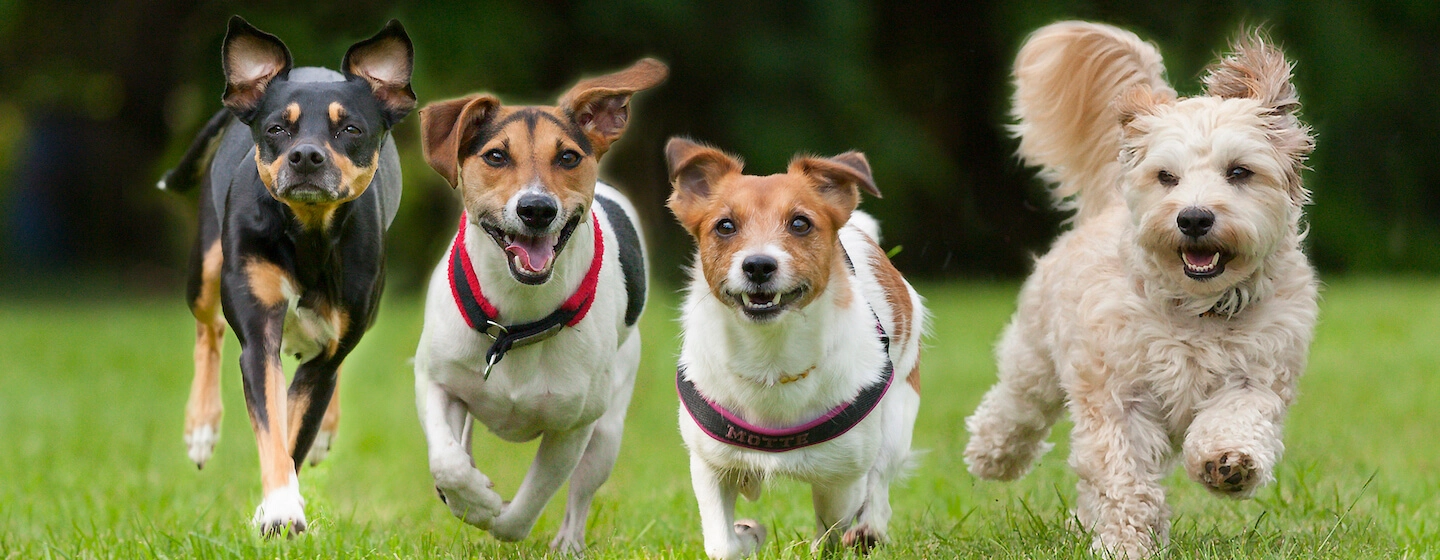

In [4]:
#Importing image
image = cv.imread("/content/drive/MyDrive/SoC Image Processing and Object Detection/Hero Dog Pedigrees.webp")
cv2_imshow(image)

In [5]:
#defining function to count and label objects in the image
def count_object(image):
  box, labels, count = cvl.detect_common_objects(image, confidence=0.5, nms_thresh=0.3, model='yolov4', enable_gpu=False)
  output = draw_bbox(image, box, labels, count)
  print(r'Number of objects :', len(labels))
  print('Labels of the object : ', labels)
  cv2_imshow(output)

Number of objects : 4
Labels of the object :  ['dog', 'dog', 'dog', 'dog']


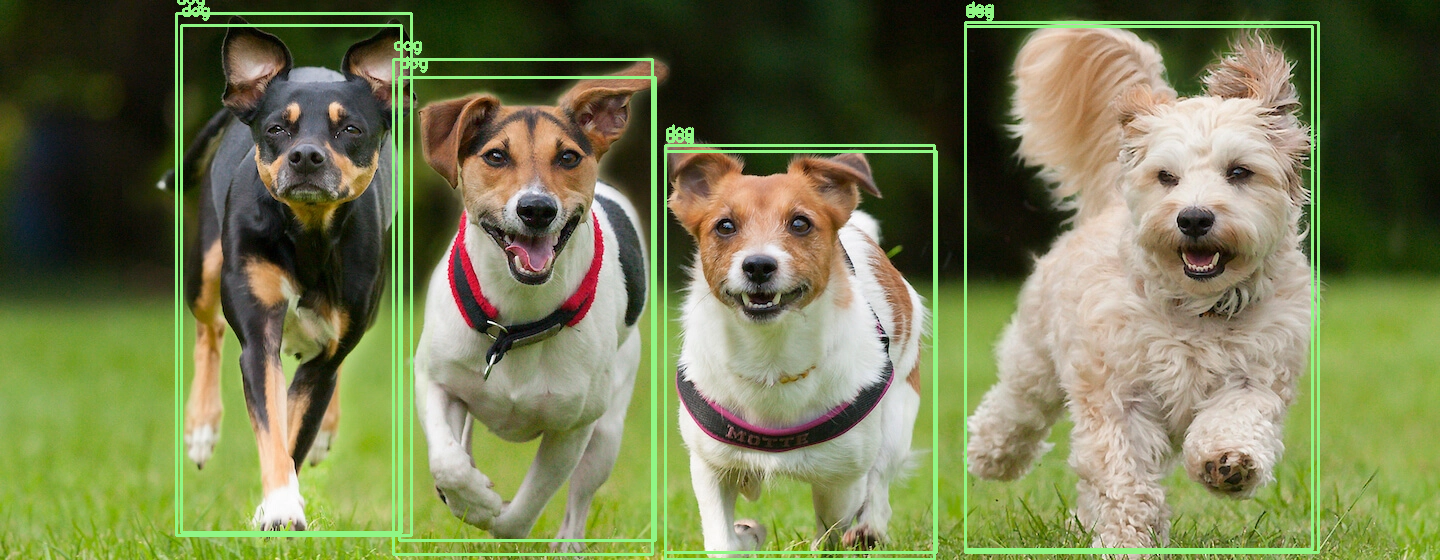

In [10]:
# calling the function
count_object(image)

**Computing the area covered by objects in an image**

Object area: 328658.5


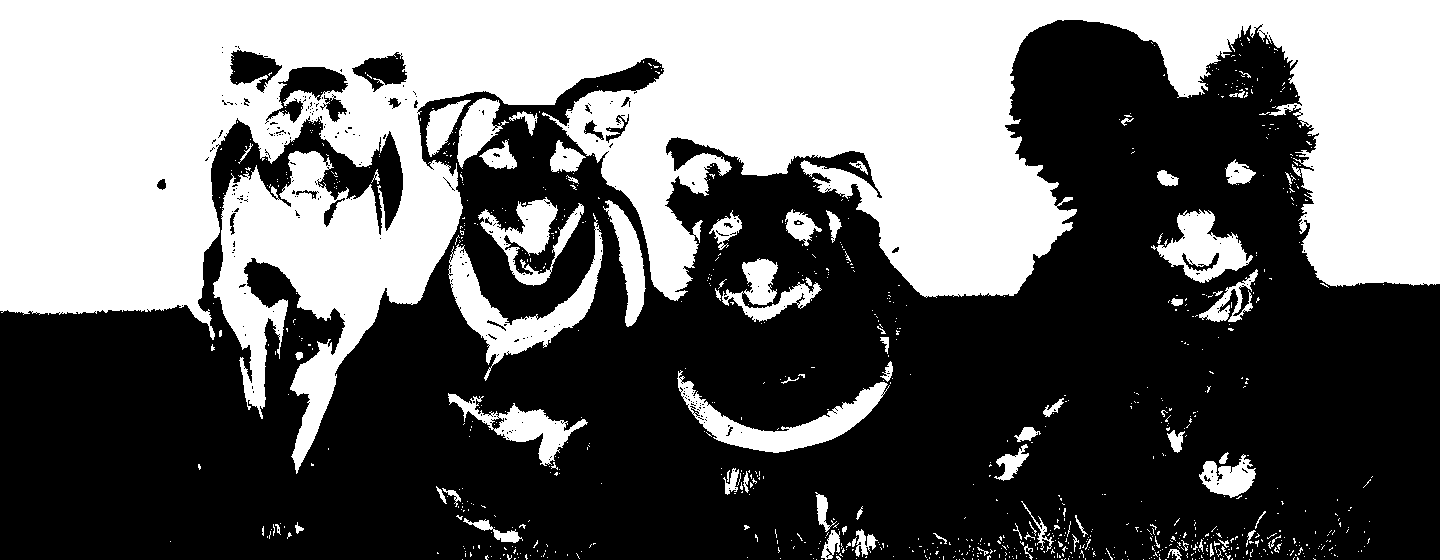

In [9]:
def object_area(image_path):
    # Load the image
    image = cv.imread(image_path)

    # Converting the image to grayscale
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

    # Applying inverse binary thresholding to obtain a inversed binary image using otsu thresholding method
    _, binary = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV | cv.THRESH_OTSU)

    # Finding contours in the binary image
    contours, hierarchies = cv.findContours(binary, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

    total_area = 0
    # Iterating through the whole area
    for contour in contours:
        # Calculate the area of each contour
        area = cv.contourArea(contour)
        total_area += area

    # Printing the measured area
    print("Object area:", total_area)
    cv2_imshow(binary)

# Providing the path of the image
image_path = "/content/drive/MyDrive/SoC Image Processing and Object Detection/Hero Dog Pedigrees.webp"

# Calling the function to measure the area of the object in the image
object_area(image_path)
